In [5]:
%matplotlib inline

comparison_of_manifold_learning_methods


TypeError: LocallyLinearEmbedding.__init__() takes 1 positional argument but 3 positional arguments (and 2 keyword-only arguments) were given

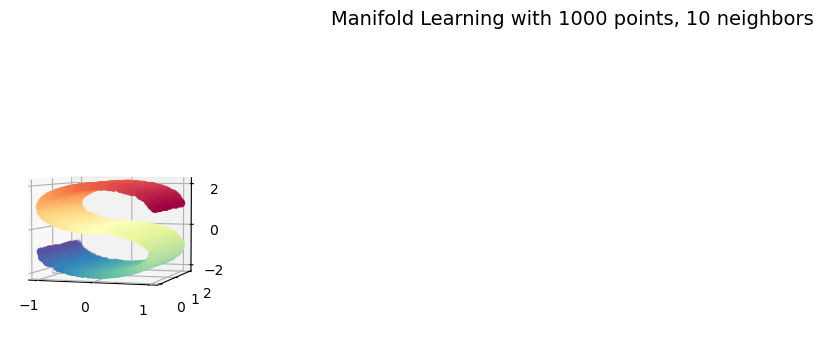

In [6]:
'''comparison_of_manifold_learning_methods'''

print(__doc__)

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

# Variables for manifold learning.
n_points = 5000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding, n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                            n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                    random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))

    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

In [7]:
'''Przygotowanie danych do modelowania'''

# operacje na danych

import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

from sklearn import preprocessing
from sklearn import compose
from sklearn import covariance
from sklearn import impute
from sklearn import model_selection


# ustawienie ziarna losowości
np.random.seed(1)

# tworzenie zbioru danych
dane = np.random.rand(20,2)
dane

array([[4.17022005e-01, 7.20324493e-01],
       [1.14374817e-04, 3.02332573e-01],
       [1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01],
       [3.96767474e-01, 5.38816734e-01],
       [4.19194514e-01, 6.85219500e-01],
       [2.04452250e-01, 8.78117436e-01],
       [2.73875932e-02, 6.70467510e-01],
       [4.17304802e-01, 5.58689828e-01],
       [1.40386939e-01, 1.98101489e-01],
       [8.00744569e-01, 9.68261576e-01],
       [3.13424178e-01, 6.92322616e-01],
       [8.76389152e-01, 8.94606664e-01],
       [8.50442114e-02, 3.90547832e-02],
       [1.69830420e-01, 8.78142503e-01],
       [9.83468338e-02, 4.21107625e-01],
       [9.57889530e-01, 5.33165285e-01],
       [6.91877114e-01, 3.15515631e-01],
       [6.86500928e-01, 8.34625672e-01],
       [1.82882773e-02, 7.50144315e-01]])

In [8]:
'''Skalowanie zmiennych'''

# wzór na przeskalowanie (skala os 0 do 1):
# (x - min(x)) / (max(x) - min(x))
print("Dane przed skalowaniem \n", dane)


Dane przed skalowaniem 
 [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01]
 [4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01]
 [2.73875932e-02 6.70467510e-01]
 [4.17304802e-01 5.58689828e-01]
 [1.40386939e-01 1.98101489e-01]
 [8.00744569e-01 9.68261576e-01]
 [3.13424178e-01 6.92322616e-01]
 [8.76389152e-01 8.94606664e-01]
 [8.50442114e-02 3.90547832e-02]
 [1.69830420e-01 8.78142503e-01]
 [9.83468338e-02 4.21107625e-01]
 [9.57889530e-01 5.33165285e-01]
 [6.91877114e-01 3.15515631e-01]
 [6.86500928e-01 8.34625672e-01]
 [1.82882773e-02 7.50144315e-01]]


In [9]:
# definiowanie zakresu skalowania danych
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# skalowanie danych
skalowane_dane = scaler.fit_transform(dane)
print("Dane przeskalowane \n", skalowane_dane)
print("\n")
print("Min: ", skalowane_dane.min(axis=0))
print("\n")
print("Max: ", skalowane_dane.max(axis=0))

Dane przeskalowane 
 [[0.43528758 0.73317341]
 [0.         0.28333606]
 [0.15310641 0.05734333]
 [0.19435233 0.32985762]
 [0.4141401  0.53783717]
 [0.43755587 0.69539388]
 [0.21334639 0.90298808]
 [0.0284756  0.67951798]
 [0.43558285 0.55922433]
 [0.14645667 0.17116395]
 [0.83592709 1.        ]
 [0.3271225  0.70303816]
 [0.91490657 0.92073356]
 [0.08867409 0.        ]
 [0.17719821 0.90301505]
 [0.10256317 0.41116019]
 [1.         0.53175515]
 [0.72226006 0.29752349]
 [0.71664685 0.85618282]
 [0.01897512 0.7652651 ]]


Min:  [0. 0.]


Max:  [1. 1.]


In [10]:
# rozkład pierwszej kolumny
ff.create_distplot([skalowane_dane[:,0]], ['skalowanie'])

In [11]:
'''Normalizacja zmiennych'''

# wzór na normalizację:
# normalizacja = (x - min) / std(x)

# dane przed normalizacjąq
print("Dane przed normalizacją \n", dane)


Dane przed normalizacją 
 [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01]
 [4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01]
 [2.73875932e-02 6.70467510e-01]
 [4.17304802e-01 5.58689828e-01]
 [1.40386939e-01 1.98101489e-01]
 [8.00744569e-01 9.68261576e-01]
 [3.13424178e-01 6.92322616e-01]
 [8.76389152e-01 8.94606664e-01]
 [8.50442114e-02 3.90547832e-02]
 [1.69830420e-01 8.78142503e-01]
 [9.83468338e-02 4.21107625e-01]
 [9.57889530e-01 5.33165285e-01]
 [6.91877114e-01 3.15515631e-01]
 [6.86500928e-01 8.34625672e-01]
 [1.82882773e-02 7.50144315e-01]]


In [12]:
# zdefiniowanie normalizatora l1 - norma Manhattan
norm = preprocessing.Normalizer(norm='l1')

# normalizacja danych
norm_dane = norm.transform(dane)
print("Dane po normalizacji \n", norm_dane)
print("\n")
print("Suma wg. wierszy:", norm_dane.sum(axis=1))

Dane po normalizacji 
 [[3.66662231e-01 6.33337769e-01]
 [3.78164892e-04 9.99621835e-01]
 [6.13798727e-01 3.86201273e-01]
 [3.50231061e-01 6.49768939e-01]
 [4.24085262e-01 5.75914738e-01]
 [3.79562835e-01 6.20437165e-01]
 [1.88858281e-01 8.11141719e-01]
 [3.92453864e-02 9.60754614e-01]
 [4.27568748e-01 5.72431252e-01]
 [4.14746642e-01 5.85253358e-01]
 [4.52652226e-01 5.47347774e-01]
 [3.11633286e-01 6.88366714e-01]
 [4.94856704e-01 5.05143296e-01]
 [6.85293315e-01 3.14706685e-01]
 [1.62056114e-01 8.37943886e-01]
 [1.89327153e-01 8.10672847e-01]
 [6.42424088e-01 3.57575912e-01]
 [6.86799778e-01 3.13200222e-01]
 [4.51310843e-01 5.48689157e-01]
 [2.37994556e-02 9.76200544e-01]]


Suma wg. wierszy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
# rozkład pierwszej kolumny
ff.create_distplot([norm_dane[:,0]], ['normalizacja'])

In [14]:
'''Standaryzacja zmiennych'''

print("Dane przed standaryzacją \n", dane)


Dane przed standaryzacją 
 [[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01]
 [4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01]
 [2.73875932e-02 6.70467510e-01]
 [4.17304802e-01 5.58689828e-01]
 [1.40386939e-01 1.98101489e-01]
 [8.00744569e-01 9.68261576e-01]
 [3.13424178e-01 6.92322616e-01]
 [8.76389152e-01 8.94606664e-01]
 [8.50442114e-02 3.90547832e-02]
 [1.69830420e-01 8.78142503e-01]
 [9.83468338e-02 4.21107625e-01]
 [9.57889530e-01 5.33165285e-01]
 [6.91877114e-01 3.15515631e-01]
 [6.86500928e-01 8.34625672e-01]
 [1.82882773e-02 7.50144315e-01]]


In [15]:
# zdefiniowanie standaryzatora
stand = preprocessing.StandardScaler()

# standaryzacja danych
stnad_dane = stand.fit_transform(dane)
print("Dane zetandaryzowane \n", stnad_dane)
print("\n")
print("Średnia: ", stnad_dane.mean(axis=0).round())
print("Odchylenie standardowe: ", stnad_dane.std(axis=0))

Dane zetandaryzowane 
 [[ 0.21852452  0.56850692]
 [-1.19783703 -0.96977166]
 [-0.69965137 -1.74258381]
 [-0.56544322 -0.81068498]
 [ 0.14971375 -0.0994713 ]
 [ 0.2259052   0.43931481]
 [-0.50363935  1.14921073]
 [-1.10518165  0.38502507]
 [ 0.21948527 -0.02633506]
 [-0.72128863 -1.35335907]
 [ 1.52214636  1.48095589]
 [-0.13342869  0.46545543]
 [ 1.77913393  1.20989378]
 [-0.90930464 -1.93867694]
 [-0.6212602   1.14930298]
 [-0.8641116  -0.53266005]
 [ 2.05601541 -0.12026955]
 [ 1.15229062 -0.92125585]
 [ 1.13402609  0.98915393]
 [-1.13609478  0.67824873]]


Średnia:  [0. 0.]
Odchylenie standardowe:  [1. 1.]


In [16]:
# rozkład pierwszej kolumny
ff.create_distplot([stnad_dane[:,0]], ['standaryzacja'])

In [17]:
'''Grupowanie zmiennych'''

# tworzenie zbioru
dane_2 = np.random.randint(16,100,20).reshape(10,2)
klienci = pd.DataFrame(dane_2, columns=["grupa1", "grupa2"])
print("Dane przed zastosowaniem progów:\n", klienci)

Dane przed zastosowaniem progów:
    grupa1  grupa2
0      31      80
1      84      41
2      23      42
3      41      38
4      25      83
5      39      43
6      53      73
7      99      54
8      24      48
9      50      26


In [18]:
# ustawienie wartości progowej
prog = preprocessing.Binarizer(threshold=50)
# zastosowanie progu
prog.fit_transform(klienci)

array([[0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0]])

In [19]:
# zastosowanie kilku wartości progowych
klienci_prog = np.digitize(klienci, bins=[18,26,50])
print("Dane przed zastosowaniem progów:\n", klienci)
print("\n")
print("Dane po zastosowaniu progów:\n", klienci_prog)

Dane przed zastosowaniem progów:
    grupa1  grupa2
0      31      80
1      84      41
2      23      42
3      41      38
4      25      83
5      39      43
6      53      73
7      99      54
8      24      48
9      50      26


Dane po zastosowaniu progów:
 [[2 3]
 [3 2]
 [1 2]
 [2 2]
 [1 3]
 [2 2]
 [3 3]
 [3 3]
 [1 2]
 [3 2]]


In [20]:
np.digitize(klienci, bins=[18,26,50], right=True)

array([[2, 3],
       [3, 2],
       [1, 2],
       [2, 2],
       [1, 3],
       [2, 2],
       [3, 3],
       [3, 3],
       [1, 2],
       [2, 1]], dtype=int64)

In [21]:
'''Podmiana wartości brakujących'''
# uzupełnienie wartości brakujacych, gdzie argument 'strategy' przedstawia strategię uzupełnienia:
# strategy=mean - na średnią
# strategy=median - na medianę
# strategy=most_frequent - na najczęściej występującą wartość

# tworzenie zbioru
braki_danych = pd.DataFrame(np.random.randint(16,100,20).reshape(10,2), columns=["grupa1", "grupa2"])
# usuwanie części obserwacji
braki_danych["grupa1"][0] = np.nan
braki_danych["grupa2"][0] = np.nan
print(braki_danych)

   grupa1  grupa2
0     NaN     NaN
1    41.0    87.0
2    90.0    78.0
3    62.0    48.0
4    39.0    71.0
5    81.0    93.0
6    19.0    16.0
7    93.0    22.0
8    68.0    86.0
9    18.0    92.0


In [22]:
# tworzenie imputera
imputer = impute.SimpleImputer(strategy='mean')
# wyuczenie i zastosowanie imputera
imputer.fit_transform(braki_danych)

array([[56.77777778, 65.88888889],
       [41.        , 87.        ],
       [90.        , 78.        ],
       [62.        , 48.        ],
       [39.        , 71.        ],
       [81.        , 93.        ],
       [19.        , 16.        ],
       [93.        , 22.        ],
       [68.        , 86.        ],
       [18.        , 92.        ]])

In [23]:
# sprawdzenie średniej danych
braki_danych.mean()

grupa1    56.777778
grupa2    65.888889
dtype: float64

In [24]:
# operacje na danych tekstowych


# tworzenie zbioru
braki_danych_2 = pd.DataFrame([np.NaN, "Michał", "Michał", "Robert", "Arkadiusz", "Anna", "Dorota"], columns=["imiona"])
# usuwanie wartości
braki_danych_2["imiona"][0] = np.NaN
# tworzenie imputera
imputer_2 = impute.SimpleImputer(strategy='most_frequent')
# wyuczenie i zastosowanie imputera
imputer_2.fit_transform(braki_danych_2)

array([['Michał'],
       ['Michał'],
       ['Michał'],
       ['Robert'],
       ['Arkadiusz'],
       ['Anna'],
       ['Dorota']], dtype=object)

In [25]:
# wyświetlenie kategorii przed zasotoswaniem imputera,
# gdzie 'dropna=False' pozwala uwzględnić wartości brakujące w podsumowaniu
braki_danych_2["imiona"].value_counts(dropna=False)

Michał       2
NaN          1
Robert       1
Arkadiusz    1
Anna         1
Dorota       1
Name: imiona, dtype: int64

In [26]:
# przypisanie wartości po imputacji aktualizując zmienną braki_danych_2
braki_danych_2["imiona"] = imputer_2.fit_transform(braki_danych_2)
braki_danych_2["imiona"].value_counts(dropna=False)

Michał       3
Robert       1
Arkadiusz    1
Anna         1
Dorota       1
Name: imiona, dtype: int64

In [27]:
'''Kodowanie kategorii'''

# wczytanie danych
df = pd.read_csv("https://bit.ly/33NOQXD")
print(df.shape)
df.head(10)

(16598, 11)


Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26  
6     11.38      9.23      6.50         2.90         30.01  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62  
9     26.93      0.63      0.28         0.47         28.31

In [28]:
# wyświetlenie kategorii dla wybranej kolumny
df["Genre"].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [29]:
'''LabelEncoder'''

'''wersja krokowa'''

# tworzenie enkodera wg. kolejności
label_encoder = preprocessing.LabelEncoder()
# użycie enkodera
fit = label_encoder.fit(df["Genre"])
fit.transform(df["Genre"])


array([10,  4,  6, ...,  6,  5,  4])

In [30]:
'''wersja skrócona'''

# tworzenie enkodera wg. kolejności
label_encoder = preprocessing.LabelEncoder()
# użycie enkodera
label_encoder.fit_transform(df["Genre"])

array([10,  4,  6, ...,  6,  5,  4])

In [31]:
'''LabelBinarizer'''

# tworzenie enkodera binarnego
bin_encoder = preprocessing.LabelBinarizer()
# użycie enkodera
bin_encoder.fit_transform(df["Genre"])

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [32]:
# wylistowanie kategorii
bin_encoder.classes_

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype='<U12')

In [33]:
'''OneHotEncoder'''

# tworzenie enkodera 
hot_encoder = preprocessing.OneHotEncoder()
# użycie enkodera
hot_encoder.fit_transform(df["Genre"].values.reshape(-1,1)).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
# tworzenie inteligentnego enkodera
ihot_encoder = compose.ColumnTransformer(transformers=[("encoder", preprocessing.OneHotEncoder(categories="auto"),["Genre"])], remainder="passthrough")

# użycie enkodera
transformed = ihot_encoder.fit_transform(df)
print(transformed)

[[0.0 0.0 0.0 ... 3.77 8.46 82.74]
 [0.0 0.0 0.0 ... 6.81 0.77 40.24]
 [0.0 0.0 0.0 ... 3.79 3.31 35.82]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.01]
 [0.0 0.0 0.0 ... 0.0 0.0 0.01]
 [0.0 0.0 0.0 ... 0.0 0.0 0.01]]


In [35]:
# tworzenie inteligentnego enkodera i przekształcenie w DF
ihot_encoder_2 = compose.ColumnTransformer(transformers=[("encoder", preprocessing.OneHotEncoder(categories="auto"),["Genre"])], remainder="drop")
# użycie enkodera
transformed2 = ihot_encoder_2.fit_transform(df).toarray()
# tworzenie DF
pd.DataFrame(transformed2, columns=["Genre_"+ str("a") for i in range(transformed2.shape[1])])

Genre_a  Genre_a  Genre_a  Genre_a  Genre_a  Genre_a  Genre_a  Genre_a  \
0          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1          0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
2          0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
3          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4          0.0      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
16593      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
16594      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
16595      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
16596      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
16597      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

       Genre_a  Genre_a  Genre_a  Genre_a  
0          0.0      0.0      1.0      0.0  
1          0.0      0.0      0.0      0.0  
2          0.0      0.0      0.0      0.0  
3          0.0      0.0      1.0      0.0  
4          0.0      0.0      0.0      0.0  
...        ...      ...      ...      ...  
16593      0.0      0.0      0.0      0.0  
16594      1.0      0.0      0.0      0.0  
16595      0.0      0.0      0.0      0.0  
16596      0.0      0.0      0.0      0.0  
16597      0.0      0.0      0.0      0.0  

[16598 rows x 12 columns]

In [36]:
'''Get_dummies'''

# kodowanie kategorii
pd.get_dummies(df, columns=["Genre"], prefix_sep="_")

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0      2006.0    Nintendo     41.49     29.02      3.77         8.46   
1      1985.0    Nintendo     29.08      3.58      6.81         0.77   
2      2008.0    Nintendo     15.85     12.88      3.79         3.31   
3      2009.0    Nintendo     15.75     11.01      3.28         2.96   
4      1996.0    Nintendo     11.27      8.89     10.22         1.00   
...       ...         ...       ...       ...       ...          ...   
16593  2002.0       Kemco      0.01      0.00      0.00         0.00   
16594  2003.0  Infogrames      0.01      0.00      0.00         0.00   
16595  2008.0  Activision      0.00      0.00      0.00         0.00   
16596  2010.0    7G//AMES      0.00      0.01      0.00         0.00   
16597  2003.0     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  ...  Genre_Fighting  Genre_Misc  Genre_Platform  \
0             82.74  ...               0           0               0   
1             40.24  ...               0           0               1   
2             35.82  ...               0           0               0   
3             33.00  ...               0           0               0   
4             31.37  ...               0           0               0   
...             ...  ...             ...         ...             ...   
16593          0.01  ...               0           0               1   
16594          0.01  ...               0           0               0   
16595          0.01  ...               0           0               0   
16596          0.01  ...               0           0               0   
16597          0.01  ...               0           0               1   

       Genre_Puzzle  Genre_Racing  Genre_Role-Playing  Genre_Shooter  \
0                 0             0                   0              0   
1                 0             0                   0              0   
2                 0             1                   0              0   
3                 0             0                   0              0   
4                 0             0                   1              0   
...             ...           ...                 ...            ...   
16593             0             0                   0              0   
16594             0             0                   0              1   
16595             0             1                   0              0   
16596             1             0                   0              0   
16597             0             0                   0              0   

       Genre_Simulation  Genre_Sports  Genre_Strategy  
0                     0             1               0  
1                     0             0               0  
2                     0             0               0  
3                     0             1               0  
4                     0             0               0  
...                 ...           ...             ...  
16593                 0             0               0  
16594                 0             0               0  
16595   

In [37]:
# tworzenie inteligentnego enkodera i przekształcanie w DF
ihot_encoder_3 = compose.ColumnTransformer(transformers=[("encoder", preprocessing.OneHotEncoder(categories="auto"),["Genre"])], remainder="drop")

# uczenie enkodera
fit_transformed = ihot_encoder_3.fit(df)
# uzycie enkodera
fit_transformed.transform(df).toarray().shape

(16598, 12)

In [38]:
# pobieranie nazw cech po kodowaniu
feature_names = ihot_encoder_3.named_transformers_['encoder'].get_feature_names_out(['Genre'])
print(feature_names)



['Genre_Action' 'Genre_Adventure' 'Genre_Fighting' 'Genre_Misc'
 'Genre_Platform' 'Genre_Puzzle' 'Genre_Racing' 'Genre_Role-Playing'
 'Genre_Shooter' 'Genre_Simulation' 'Genre_Sports' 'Genre_Strategy']


In [39]:
# tworzenie zbioru do testu 
df_2 = df
df_2["Genre"][0] = "NEW"
df_2["Genre"].value_counts()

Action          3316
Sports          2345
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
NEW                1
Name: Genre, dtype: int64

In [40]:

df.shape
# fit_transformed.transform(df_2).toarray().shape - nie zadziała, bo df_2 musi pasować kształtem do df. Przed transformacją należy usunąć kolumnę "Genre"
# df_2.drop(columns=["Genre"], inplace=True)
# uzycie z OneHotEncoder
fit_transformed.transform(df_2).toarray().shape




ValueError: Found unknown categories ['NEW'] in column 0 during transform

In [41]:
pd.get_dummies(df_2, columns=["Genre"]).columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Publisher', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_NEW',
       'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing',
       'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'],
      dtype='object')

In [42]:
'''Przetwarzanie daty i czasu'''

from IPython.display import IFrame
IFrame(src='https://strftime.org/', width=1000, height=600)

In [43]:
# tworzenie zbioru
data_tekst = np.array(["01-01-2020 10:25 AM",
                       "03-10-2020 06:59 AM",
                       "17-12-2020 03:15 PM",
                       "11-09-2020 10:56 PM",
                       "07-03-2020 09:05 AM"])
# konwertowanie tekstu w daty i godziny
data = pd.to_datetime(data_tekst, format="%d-%m-%Y %I:%M %p")
data

DatetimeIndex(['2020-01-01 10:25:00', '2020-10-03 06:59:00',
               '2020-12-17 15:15:00', '2020-09-11 22:56:00',
               '2020-03-07 09:05:00'],
              dtype='datetime64[ns]', freq=None)

In [44]:
'''Strefa czasowa'''

# strefa czasowa Warszawa
data_warszawa = data.tz_localize("Europe/Warsaw")
print(data_warszawa)

DatetimeIndex(['2020-01-01 10:25:00+01:00', '2020-10-03 06:59:00+02:00',
               '2020-12-17 15:15:00+01:00', '2020-09-11 22:56:00+02:00',
               '2020-03-07 09:05:00+01:00'],
              dtype='datetime64[ns, Europe/Warsaw]', freq=None)


In [45]:
# strefa czasowa Londyn
data_warszawa.tz_convert("Europe/London")

DatetimeIndex(['2020-01-01 09:25:00+00:00', '2020-10-03 05:59:00+01:00',
               '2020-12-17 14:15:00+00:00', '2020-09-11 21:56:00+01:00',
               '2020-03-07 08:05:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq=None)

In [46]:
'''zakresy dat'''

# tworzenie zbioru danych
data_df = pd.DataFrame()
data_df["data"] = pd.date_range("1/1/2019", periods=1000, freq="H")
data_df["liczba"] = np.random.randn(1000)
data_df

data    liczba
0   2019-01-01 00:00:00 -2.238771
1   2019-01-01 01:00:00  1.755397
2   2019-01-01 02:00:00 -0.264193
3   2019-01-01 03:00:00  0.846294
4   2019-01-01 04:00:00  2.086733
..                  ...       ...
995 2019-02-11 11:00:00  1.616382
996 2019-02-11 12:00:00  0.572850
997 2019-02-11 13:00:00 -0.258546
998 2019-02-11 14:00:00  1.497102
999 2019-02-11 15:00:00 -0.428351

[1000 rows x 2 columns]

In [47]:
# filtrowanie zbioru wg. zakresu dat
data_df[(data_df["data"] > "2019-02-11 11:00:00") & (data_df["data"] < "2019-02-11 14:00:00")]

data    liczba
996 2019-02-11 12:00:00  0.572850
997 2019-02-11 13:00:00 -0.258546

In [48]:
'''tworzenie nowych zmiennych'''

# tworzenie próby danych
data_df_s = data_df["data"].sample(10)
data_df_s

563   2019-01-24 11:00:00
490   2019-01-21 10:00:00
910   2019-02-07 22:00:00
107   2019-01-05 11:00:00
146   2019-01-07 02:00:00
648   2019-01-28 00:00:00
118   2019-01-05 22:00:00
509   2019-01-22 05:00:00
149   2019-01-07 05:00:00
693   2019-01-29 21:00:00
Name: data, dtype: datetime64[ns]

In [49]:
# minuty
data_df_s.dt.minute

563    0
490    0
910    0
107    0
146    0
648    0
118    0
509    0
149    0
693    0
Name: data, dtype: int64

In [50]:
# godziny
data_df_s.dt.hour

563    11
490    10
910    22
107    11
146     2
648     0
118    22
509     5
149     5
693    21
Name: data, dtype: int64

In [51]:
# dni
data_df_s.dt.day

563    24
490    21
910     7
107     5
146     7
648    28
118     5
509    22
149     7
693    29
Name: data, dtype: int64

In [52]:
# miesiące
data_df_s.dt.month

563    1
490    1
910    2
107    1
146    1
648    1
118    1
509    1
149    1
693    1
Name: data, dtype: int64

In [53]:
# lata
data_df_s.dt.year

563    2019
490    2019
910    2019
107    2019
146    2019
648    2019
118    2019
509    2019
149    2019
693    2019
Name: data, dtype: int64

In [54]:
# dni tygodnia
data_df_s.dt.dayofweek

563    3
490    0
910    3
107    5
146    0
648    0
118    5
509    1
149    0
693    1
Name: data, dtype: int64

In [55]:
'''Obsługa braków danych w datach'''

# tworzenie zbioru danych
data_df_m = pd.DataFrame()
data_df_m["data"] = pd.date_range("1/1/2019", periods=100, freq="H")
data_df_m["liczba"] = np.random.randint(1,10,100)
# tworzenie próby danych
data_na = data_df_m.sample(10).reset_index()
# usuwanie wartości
data_na["liczba"][1] = np.NaN
data_na["liczba"][2] = np.NaN
data_na["liczba"][3] = np.NaN
print(data_na)

   index                data  liczba
0     40 2019-01-02 16:00:00     1.0
1     59 2019-01-03 11:00:00     NaN
2     72 2019-01-04 00:00:00     NaN
3      3 2019-01-01 03:00:00     NaN
4      6 2019-01-01 06:00:00     4.0
5     67 2019-01-03 19:00:00     3.0
6      1 2019-01-01 01:00:00     5.0
7     25 2019-01-02 01:00:00     9.0
8     20 2019-01-01 20:00:00     7.0
9     10 2019-01-01 10:00:00     4.0


In [60]:
# uzupełnienie - fillna
data_na.fillna(method="ffill")

index                data  liczba
0     40 2019-01-02 16:00:00     1.0
1     59 2019-01-03 11:00:00     1.0
2     72 2019-01-04 00:00:00     1.0
3      3 2019-01-01 03:00:00     1.0
4      6 2019-01-01 06:00:00     4.0
5     67 2019-01-03 19:00:00     3.0
6      1 2019-01-01 01:00:00     5.0
7     25 2019-01-02 01:00:00     9.0
8     20 2019-01-01 20:00:00     7.0
9     10 2019-01-01 10:00:00     4.0

In [67]:
# uzupełnienie - interpolacja

data_na.interpolate(method='ffill', inplace=True)
data_na

index                data  liczba
0     40 2019-01-02 16:00:00     1.0
1     59 2019-01-03 11:00:00     1.0
2     72 2019-01-04 00:00:00     1.0
3      3 2019-01-01 03:00:00     1.0
4      6 2019-01-01 06:00:00     4.0
5     67 2019-01-03 19:00:00     3.0
6      1 2019-01-01 01:00:00     5.0
7     25 2019-01-02 01:00:00     9.0
8     20 2019-01-01 20:00:00     7.0
9     10 2019-01-01 10:00:00     4.0

In [68]:
# uzupełnianie wstecz
data_na.bfill()

index                data  liczba
0     40 2019-01-02 16:00:00     1.0
1     59 2019-01-03 11:00:00     1.0
2     72 2019-01-04 00:00:00     1.0
3      3 2019-01-01 03:00:00     1.0
4      6 2019-01-01 06:00:00     4.0
5     67 2019-01-03 19:00:00     3.0
6      1 2019-01-01 01:00:00     5.0
7     25 2019-01-02 01:00:00     9.0
8     20 2019-01-01 20:00:00     7.0
9     10 2019-01-01 10:00:00     4.0

In [69]:
# uzupełnianie do przodu
data_na.ffill()

index                data  liczba
0     40 2019-01-02 16:00:00     1.0
1     59 2019-01-03 11:00:00     1.0
2     72 2019-01-04 00:00:00     1.0
3      3 2019-01-01 03:00:00     1.0
4      6 2019-01-01 06:00:00     4.0
5     67 2019-01-03 19:00:00     3.0
6      1 2019-01-01 01:00:00     5.0
7     25 2019-01-02 01:00:00     9.0
8     20 2019-01-01 20:00:00     7.0
9     10 2019-01-01 10:00:00     4.0

In [ ]:
# interpolacja z limitem wierszy
# data_na_interpolated = data_na.interpolate( limit=2, limit_direction="backward")

# inne metody interpolacji 
# data_na.interpolate(method ="polynomial", order=2)
# data_na.interpolate(method ="time")
# data_na.interpolate(method ="index")
# data_na.interpolate(method ="values")
# data_na.interpolate(method ="linear")
# data_na.interpolate(method ="nearest")
# data_na.interpolate(method ="zero")
# data_na.interpolate(method ="quadratic")
# data_na.interpolate(method ="cubic")
# data_na.interpolate(method ="spline", order=2)
# data_na.interpolate(method ="barycentric")

In [93]:
'''Wykrywanie wartości odstających'''

# tworzenie zbioru danych
dane_3 = np.random.randint(200, 400, 20)
zakupy = pd.DataFrame(dane_3, columns=["sklep1"])
print("Dane przed zastosowaniem progów:\n", zakupy)

Dane przed zastosowaniem progów:
     sklep1
0      219
1      309
2      365
3      304
4      343
5      340
6      297
7      264
8      328
9      313
10     269
11     378
12     375
13     323
14     218
15     323
16     301
17     268
18     395
19     394


In [95]:
# tworzenie wartości odstających
zakupy["sklep1"][0] = 10
zakupy["sklep1"][1] = 700
print(zakupy)
# wizualizacja danych
px.box(zakupy, y="sklep1")

    sklep1
0       10
1      700
2      365
3      304
4      343
5      340
6      297
7      264
8      328
9      313
10     269
11     378
12     375
13     323
14     218
15     323
16     301
17     268
18     395
19     394


In [96]:
'''Metoda 1_ElipticEnvelope - dopasowuje wielowymiarowy rozkład Gaussa do zbioru danych.
Użyj hyperparametru contamination do określenia procentu obserwacji, które zostaną uznane za wartości odstające.'''

# utworzenie detektora wartości odstających na podstawie elipsy wokół danych
detektor = covariance.EllipticEnvelope(contamination=0.1)
# użycie detektora
detektor.fit(zakupy)
# wykrywanie wartości odstających
flaga_odstajace = detektor.predict(zakupy)
flaga_odstajace

array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [97]:
px.scatter(zakupy, y="sklep1", color=flaga_odstajace)

In [100]:
'''Metoda 2_IQR(Interquartile range) - wykorzystuje kwartyle do wykrywania wartości odstających.'''

# tworzenie funkcji do wyliczenia anomalii
def IQR_outliners(a):
    Q1, Q3 = np.percentile(a, [25,75])
    IQR = Q3 - Q1

    gorne_ograniczenie = Q3 + 1.5 * IQR
    dolne_ograniczenie = Q1 - 1.5 * IQR
    print("Górne ograniczenie: ", gorne_ograniczenie)
    print("Dolne ograniczenie: ", dolne_ograniczenie)

    indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
    b = np.full(shape=a.shape[0], fill_value=1)
    b[indeksy] = -1

    return b

# użycie funkcji
flaga_IQR = IQR_outliners(zakupy["sklep1"])
print(flaga_IQR)

Górne ograniczenie:  483.75
Dolne ograniczenie:  173.75
[-1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [101]:
px.scatter(zakupy, y="sklep1", color=flaga_IQR)

In [102]:
'''Podział zbioru na zbiór testowy i uczący'''

# wczytanie danych 
zbior = pd.read_csv("https://bit.ly/33NOQXD", usecols=["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"])
print(zbior.shape)
zbior.head(10)


(16598, 6)


Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0        Sports     41.49     29.02      3.77         8.46         82.74
1      Platform     29.08      3.58      6.81         0.77         40.24
2        Racing     15.85     12.88      3.79         3.31         35.82
3        Sports     15.75     11.01      3.28         2.96         33.00
4  Role-Playing     11.27      8.89     10.22         1.00         31.37
5        Puzzle     23.20      2.26      4.22         0.58         30.26
6      Platform     11.38      9.23      6.50         2.90         30.01
7          Misc     14.03      9.20      2.93         2.85         29.02
8      Platform     14.59      7.06      4.70         2.26         28.62
9       Shooter     26.93      0.63      0.28         0.47         28.31

In [103]:
# tworzenie zbiorów test i train
X_train, X_test, y_train, y_test = model_selection.train_test_split(zbior.drop(columns=["Genre"]), zbior["Genre"], test_size=.3, random_state=2020)

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11618 entries, 10405 to 9056
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      11618 non-null  float64
 1   EU_Sales      11618 non-null  float64
 2   JP_Sales      11618 non-null  float64
 3   Other_Sales   11618 non-null  float64
 4   Global_Sales  11618 non-null  float64
dtypes: float64(5)
memory usage: 544.6 KB


In [105]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 6636 to 10627
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      4980 non-null   float64
 1   EU_Sales      4980 non-null   float64
 2   JP_Sales      4980 non-null   float64
 3   Other_Sales   4980 non-null   float64
 4   Global_Sales  4980 non-null   float64
dtypes: float64(5)
memory usage: 233.4 KB


In [106]:
print(y_train)

10405        Action
9350         Action
7851         Racing
13902        Sports
3199           Misc
            ...    
1661         Racing
11971        Sports
14966    Simulation
7491         Action
9056         Racing
Name: Genre, Length: 11618, dtype: object


In [107]:
print(y_test)

6636         Sports
14473       Shooter
13860        Action
16023        Action
4293        Shooter
            ...    
2861     Simulation
10439      Platform
1828           Misc
6134         Action
10627       Shooter
Name: Genre, Length: 4980, dtype: object


In [108]:
'''Redukcja_wymiarów'''

import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np

from sklearn import preprocessing
from sklearn import decomposition
from sklearn.feature_selection import VarianceThreshold

In [109]:
# wczytanie danych
wino_df =pd.read_csv("https://bit.ly/2XYWtqG").drop(columns=["Unnamed: 0"])
wino_df.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [110]:
wino_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4898 non-null   float64
 1   volatile.acidity      4898 non-null   float64
 2   citric.acid           4898 non-null   float64
 3   residual.sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free.sulfur.dioxide   4898 non-null   float64
 6   total.sulfur.dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [111]:
# wizualizacja zależności między kolumnami
kolumny = pd.Index(wino_df.columns).tolist()
wykres = px.scatter_matrix(wino_df, dimensions=kolumny[:-1], color="quality")
wykres.update_layout(autosize=False, width=1600, height=1600)
wykres.show()

c:\Users\akarpinska2\anaconda3\lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [112]:
# lista cech objaśniających
kolumny[:-1]


['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [114]:
# utworzenie zbioru cech objasniajacych i zmiennej objasnianej
X = wino_df[kolumny[:-1]]
y = wino_df["quality"]
print(X)
print(y)

      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  

In [115]:
'''(...) za pomocą wyboru cech'''

# ograniczenie względem wariacji

# sparwdzenie wariancji
np.var(X)

fixed.acidity              0.711968
volatile.acidity           0.010157
citric.acid                0.014643
residual.sugar            25.720518
chlorides                  0.000477
free.sulfur.dioxide      289.183667
total.sulfur.dioxide    1805.716751
density                    0.000009
pH                         0.022797
sulphates                  0.013022
alcohol                    1.514118
dtype: float64

In [116]:
# zdefiniowanie wartości progowej
prog = VarianceThreshold(threshold=0.1)
# trenowanie funkcji
funkcja = prog.fit(X)
# tworzenie macierzy cech o wysokiej zmienności
cechy_silnie_zmienne = funkcja.transform(X)
# wyświetlenie macierzy cech o wysokiej wariancji
cechy_silnie_zmienne

array([[  7. ,  20.7,  45. , 170. ,   8.8],
       [  6.3,   1.6,  14. , 132. ,   9.5],
       [  8.1,   6.9,  30. ,  97. ,  10.1],
       ...,
       [  6.5,   1.2,  30. , 111. ,   9.4],
       [  5.5,   1.1,  20. , 110. ,  12.8],
       [  6. ,   0.8,  22. ,  98. ,  11.8]])

In [117]:
X.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [118]:
funkcja.variances_

array([7.11968197e-01, 1.01574668e-02, 1.46428029e-02, 2.57205179e+01,
       4.77236255e-04, 2.89183667e+02, 1.80571675e+03, 8.94369782e-06,
       2.27965259e-02, 1.30220468e-02, 1.51411779e+00])

In [119]:
X.head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [120]:
'''(...) ograniczenie względem korelacji'''

print(X)
print(y)

      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  

In [121]:
# sprawdzenie korelacji
korelacja = X.corr().abs()
print(korelacja)

                      fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity              1.000000          0.022697     0.289181   
volatile.acidity           0.022697          1.000000     0.149472   
citric.acid                0.289181          0.149472     1.000000   
residual.sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free.sulfur.dioxide        0.049396          0.097012     0.094077   
total.sulfur.dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                         0.425858          0.031915     0.163748   
sulphates                  0.017143          0.035728     0.062331   
alcohol                    0.120881          0.067718     0.075729   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity               0.089021   0.023086             0.049396   
volatile.acidit

In [123]:
# zdefiniowanie macierzy do filtrowania
macierz_filtr = np.triu(np.ones(korelacja.shape), k=1).astype(np.bool)
print(macierz_filtr)

[[False  True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True  True  True]
 [False False False False False  True  True  True  True  True  True]
 [False False False False False False  True  True  True  True  True]
 [False False False False False False False  True  True  True  True]
 [False False False False False False False False  True  True  True]
 [False False False False False False False False False  True  True]
 [False False False False False False False False False False  True]
 [False False False False False False False False False False False]]


C:\Users\akarpinska2\AppData\Local\Temp\ipykernel_24448\2805510641.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [124]:
# wybranie górnej cęści trójkąta macierzy korelacji
gorny_trojkat = korelacja.where(macierz_filtr)
print(gorny_trojkat)

                      fixed.acidity  volatile.acidity  citric.acid  \
fixed.acidity                   NaN          0.022697     0.289181   
volatile.acidity                NaN               NaN     0.149472   
citric.acid                     NaN               NaN          NaN   
residual.sugar                  NaN               NaN          NaN   
chlorides                       NaN               NaN          NaN   
free.sulfur.dioxide             NaN               NaN          NaN   
total.sulfur.dioxide            NaN               NaN          NaN   
density                         NaN               NaN          NaN   
pH                              NaN               NaN          NaN   
sulphates                       NaN               NaN          NaN   
alcohol                         NaN               NaN          NaN   

                      residual.sugar  chlorides  free.sulfur.dioxide  \
fixed.acidity               0.089021   0.023086             0.049396   
volatile.acidit

In [125]:
gorny_trojkat.max()

fixed.acidity                NaN
volatile.acidity        0.022697
citric.acid             0.289181
residual.sugar          0.094212
chlorides               0.114364
free.sulfur.dioxide     0.299098
total.sulfur.dioxide    0.615501
density                 0.838966
pH                      0.425858
sulphates               0.155951
alcohol                 0.780138
dtype: float64

In [126]:
# zdefiniowanie indeksów kolumn o korelacji powyżej 0.9
indeks_mocna_korelacja = [kolumna for kolumna in gorny_trojkat.columns if any(gorny_trojkat[kolumna] > 0.8)]
print(indeks_mocna_korelacja)

['density']


In [127]:
# usunięcie silnie skorelowanych cech
X.drop(columns=indeks_mocna_korelacja).head()

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free.sulfur.dioxide  total.sulfur.dioxide    pH  sulphates  alcohol  
0                 45.0                 170.0  3.00       0.45      8.8  
1                 14.0                 132.0  3.30       0.49      9.5  
2                 30.0                  97.0  3.26       0.44     10.1  
3                 47.0                 186.0  3.19       0.40      9.9  
4                 47.0                 186.0  3.19       0.40      9.9

In [ ]:
'''PCA (Principal Component Analysis) - służy do redukcji wymiarowości danych poprzez wyodrębnienie
najważniejszych cech (tzw. składowych głównych) z oryginalnego zbioru danych.'''

In [128]:
print(X)
print(y)

      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  

In [129]:
'''Scikit-Learn:PCA()'''

# wybór liczby wymiarów

# dobór liczby wymiarów na podstawie wybrania poziomu wariancji zmiennych, które chcemy zachować w zbiorze danych

# tworzenie kompresora
kompresor_pca = decomposition.PCA(n_components=0.95)
# wyuczenie kompresora
fit_pca = kompresor_pca.fit(X)
# użycie kompresora
X_VAR = fit_pca.transform(X)
print(X_VAR)

[[ 33.7327539    1.23828497]
 [-11.92579973 -18.95751887]
 [-41.22467147   5.73987365]
 ...
 [-27.99422284   1.98656157]
 [-31.62562278  -7.36798453]
 [-42.66909003  -2.30113142]]


In [130]:
'''Redukowanie wymiarowości do podanej liczby zmiennych'''

'''2D'''

# redukcja zbioru do 2 wymiarów

# tworzenie kompresora
kompresor_pca = decomposition.PCA(n_components=2)
# wyuczenie kompresora
fit_pca = kompresor_pca.fit(X)
# użycie kompresora
X_2D = fit_pca.transform(X)
print(X_2D)



[[ 33.7327539    1.23828497]
 [-11.92579973 -18.95751887]
 [-41.22467147   5.73987365]
 ...
 [-27.99422284   1.98656157]
 [-31.62562278  -7.36798453]
 [-42.66909003  -2.30113142]]


In [131]:
# tworzenie zbioru dla wykresu
X_2D_df = pd.DataFrame(X_2D, columns=["x1", "x2"])
X_2D_df["ocena"] = y
# wykres dla 2 wymiarów
wykres = px.scatter(X_2D_df, x="x1", y="x2", color="ocena", log_x=True)
wykres.show()



In [132]:
'''3D'''

# redukcja zbioru do 3 wymiarów

# tworzenie kompresora
kompresor_pca = decomposition.PCA(n_components=3)
# wyuczenie kompresora
fit_pca = kompresor_pca.fit(X)
# użycie kompresora
X_3D = fit_pca.transform(X)
print(X_3D)

[[ 33.7327539    1.23828497  12.77529181]
 [-11.92579973 -18.95751887  -3.85783398]
 [-41.22467147   5.73987365   2.4660316 ]
 ...
 [-27.99422284   1.98656157  -3.76679051]
 [-31.62562278  -7.36798453  -3.85584946]
 [-42.66909003  -2.30113142  -3.60383843]]


In [133]:
# wykres dla 3 wymiarów - 1
X_3D_df = pd.DataFrame(X_3D, columns=["x1", "x2", "x3"])
X_3D_df["ocena"] = y
wykres = px.scatter_3d(X_3D_df, x="x1", y="x2", z="x3", color="ocena")
wykres.show()

In [134]:
# wykres dla 3 wymiarów - 2
wykres = go.Figure(data=[go.Surface(z=X_3D)])
wykres.update_layout(title='Zbiór danych zredukowany do 3 wymiarów')

In [ ]:
'''Scit-Learn: KernelPCA()

Jądrowa analiza PCA, gdzie można wybrać dowolny kernel z listy:
linear(jądro liniowe), poly(jądro wielomianowe), rbf(jądro radialnej funkcji bazowej), cosine(jądro kosinusowe)'''

In [135]:
# redukcja zbioru do 2 wymiarów

# tworzenie kompresora
kompresor_pca_kernel = decomposition.KernelPCA(n_components=2, kernel="rbf")
# wyuczenie kompresora
fit_pca_kernel = kompresor_pca_kernel.fit(X)
# użycie kompresora
X_2D_kernel = fit_pca_kernel.transform(X)
print(X_2D_kernel)

[[-0.006959   -0.00705223]
 [-0.01104746 -0.01169776]
 [-0.02298976  0.09207883]
 ...
 [ 0.25223008 -0.01905768]
 [ 0.20415716  0.00464675]
 [-0.03342393  0.15642582]]


In [136]:
# tworzenie zbioru dla wykresu
X_2D_kernel_df = pd.DataFrame(X_2D_kernel, columns=["x1", "x2"])
X_2D_kernel_df["ocena"] = y
# wykres dla 2 wymiarów
wykres = px.scatter(X_2D_kernel_df, x="x1", y="x2", color="ocena", log_x=True)
wykres.show()

In [137]:
'''3D'''

# redukcja zbioru do 3 wymiarów

# tworzenie kompresora
kompresor_pca_kernel = decomposition.KernelPCA(n_components=3, kernel="rbf")
# wyuczenie kompresora
fit_pca_kernel = kompresor_pca_kernel.fit(X)
# użycie kompresora
X_3D_kernel = fit_pca_kernel.transform(X)
print(X_3D_kernel)

[[-0.006959   -0.00705223 -0.00401555]
 [-0.01104746 -0.01169776 -0.00890086]
 [-0.02298976  0.09207883  0.00615953]
 ...
 [ 0.25223008 -0.01905768  0.2048125 ]
 [ 0.20415716  0.00464675 -0.11041185]
 [-0.03342393  0.15642582 -0.08684003]]


In [139]:
# wykres dla 3 wymiarów - 1
X_3D_kernel_df = pd.DataFrame(X_3D_kernel, columns=["x1", "x2", "x3"])
X_3D_kernel_df["ocena"] = y
wykres = px.scatter_3d(X_3D_kernel_df, x="x1", y="x2", z="x3", color="ocena")
wykres.show()

In [140]:
# wykres dla 3 wymiarów - 2
wykres = go.Figure(data=[go.Surface(z=X_3D_kernel)])
wykres.update_layout(title='Zbiór danych zredukowany do 3 wymiarów')